In [18]:
import sys
sys.path.append(r'C:\a_PhD Research\RUL\Codes\Updated Codes')

import os
import h5py
import numpy as np
import pandas as pd
from CSVFileGeneration import H5_to_CSVFile
from FeatureExtractions import create_dataset, smoothing, mk_test


***Data Processing***
_____________________________
H5 file to CSV file generation process

In [ ]:
#Parameter definition 
data_type = 'signals_sensor' #signals_sensor/signals_machine
dir_path = r'C:\a_PhD Research\RUL\Dataset\cnc_data\h5filesnew\M1T3'
number_of_features = 4 #4/10

In [ ]:
#CSV file generation from H5 files
H5_to_CSVFile(data_type, dir_path, number_of_features)

***Feature Extractions***

________________________________


#Dataset Creation from CSV Files (Adding features)

For Signals Sensor type the features are:
'force_sensor_x', 
'force_sensor_y', 
'force_sensor_z', 
'time_sensor'

For Signals Machine type the features are:',
 'position_control_deviation_axis_x',
 'position_control_deviation_axis_y',
 'time_machine',
 'tool_position_x',
 'tool_position_y',
 'tool_position_z',
 'torque

Feature extractions from the dataset (Only time domain features are extracted):
'mean', 
'std', 
'var', 
'rms', 
'max_val', 
'skewness', 
'kurt', 
'sf', 
'cf', 
'mf'
 _spindle'

In [3]:
data_path = r'C:\a_PhD Research\RUL\Codes\CNCDataset\M1T1\S_Machine'

In [4]:
data = create_dataset(data_path, 'signals_machine')

In [5]:
for k, v in data.items():
    print(k)

pcd_axis_x
pcd_axis_y
tp_x
tp_y
tp_z
ta_x
ta_y
ta_z
ts


In [6]:
data['pcd_axis_x'].head(3)

,mean,std,var,rms,max_val,skewness,kurt,sf,cf,mf
0,0.231299,0.000000,0.000000,0.000000,0.006309,0.196331,0.246600,0.466990,0.408993,0.738913
1,0.612481,0.185065,0.124778,0.184855,0.000000,0.429427,0.054863,0.406036,0.033328,0.247618
2,0.270969,0.235324,0.163392,0.235286,0.145110,0.571380,0.215781,0.454583,0.356364,0.387180


In [9]:
data['pcd_axis_x']

,mean,std,var,rms,max_val,skewness,kurt,sf,cf,mf
0,0.231299,0.000000,0.000000,0.000000,0.006309,0.196331,0.246600,0.466990,0.408993,0.738913
1,0.612481,0.185065,0.124778,0.184855,0.000000,0.429427,0.054863,0.406036,0.033328,0.247618
2,0.270969,0.235324,0.163392,0.235286,0.145110,0.571380,0.215781,0.454583,0.356364,0.387180
3,0.268488,0.318025,0.231327,0.317993,0.129338,0.579893,0.086758,0.451112,0.180645,0.218169
4,0.263526,0.171082,0.114393,0.171046,0.138801,0.650028,0.349299,0.457908,0.460360,0.519706
...,...,...,...,...,...,...,...,...,...,...
604,0.684160,0.358954,0.266971,0.358766,0.078864,0.495181,0.028617,0.351030,0.000000,0.096561
605,0.697253,0.222841,0.153613,0.222618,0.151420,0.608046,0.192543,0.360358,0.396686,0.422912
606,0.520841,0.369908,0.276737,0.369765,0.211356,0.370990,0.072359,0.415156,0.304745,0.241658
607,0.326787,0.230062,0.159255,0.229989,0.126183,0.574974,0.134524,0.450522,0.313872,0.368278


In [7]:
data_smooth = smoothing(data, 35) #Data smoothing

***Feature Selection***
________________________________

Man-kandell test is performed to selet features with high monotonicity


In [10]:
mk_scores = mk_test(data)

In [15]:
signals = ['pcd_axis_x', 'pcd_axis_y', 'tp_x', 'tp_y', 'tp_z', 'ta_x', 'ta_y', 'ta_z', 'ts']
#signals = ['force_sensor_x', 'force_sensor_y', 'force_sensor_z', ]
f = ['mean', 'std', 'var', 'rms', 'max_val', 'skewness', 'kurt', 'sf', 'cf', 'mf']    

for j in range(len(signals)):
    mk_df = []    
    for i in range(10):
        mk_scores_df = pd.DataFrame.from_dict(mk_scores[signals[j]][f[i]], orient='index')
        mk_scores_df.loc[len(mk_scores_df.index)] = [f[i]]
        mk_df.append(mk_scores_df)                
    total = pd.concat([mk_df[0],mk_df[1],mk_df[2],mk_df[3],mk_df[4],mk_df[5],mk_df[6],mk_df[7],mk_df[8], mk_df[9]], axis=1)
    total.to_csv(r'C:\a_PhD Research\RUL\Codes\CNCDataset\MKTest\{m}__mkTest.csv'.format(m=signals[j]))

*** Final Dataset Generation based on selected features ***
Based on the monotonicity score we have choosen the feature from 10/4 Machine/Force data (for example 'ta_y')
Finally, adding labels to the data

In [ ]:
select_data = data_smooth['force_sensor_z'] #signal selection

In [ ]:
label_path = r'C:\a_PhD Research\RUL\Dataset\cnc_data\filelist.csv'

#select_data1 = select_data.drop(['max_val'], axis=1) #irrelevant feature drop
#select_data1.shape
#M1T1 = 0:609
#M1T2 = 609:1218
#M1T3 = 1218:1856

label = pd.read_csv(label_path)
#label.iloc[609:1219, :]['wear'].tail(10) #label index selection
wear_val = np.array(label.iloc[1218:1856]['wear'])#label index selection
select_data['label'] = wear_val
#select_data.to_csv(r"C:\a_PhD Research\RUL\Dataset\cnc_data\Processed_data\force\M1T3\force_sensor_z.csv")

***Visualization***

In [39]:
df= pd.read_csv(r"C:\a_PhD Research\RUL\Codes\CNCDataset\Processed_data\machine\m1t3_ta_y.csv")
df = df.drop(['Unnamed: 0', 'label'], axis=1)

<Axes: >

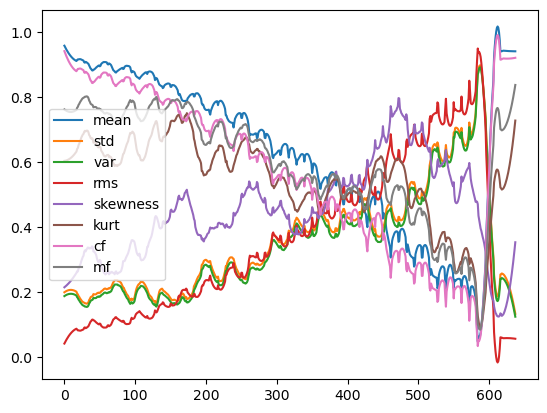

In [40]:
df.plot()